<a href="https://colab.research.google.com/github/lukaszplust/Deep_Learning/blob/main/Neuron_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementacja sieci:

I. Inicjalizacja parametrów sieci

II. Propagacja wprzód

III. Obliczenie błędu predykcji

IV. Propagacja wsteczna (uczenie modelu)

V. Test działania modelu

In [48]:
import numpy as np
import pandas as pd

X = np.array([1.6, 0.9])
y_true = np.array([2.1])

In [49]:
X

array([1.6, 0.9])

In [50]:
y_true

array([2.1])

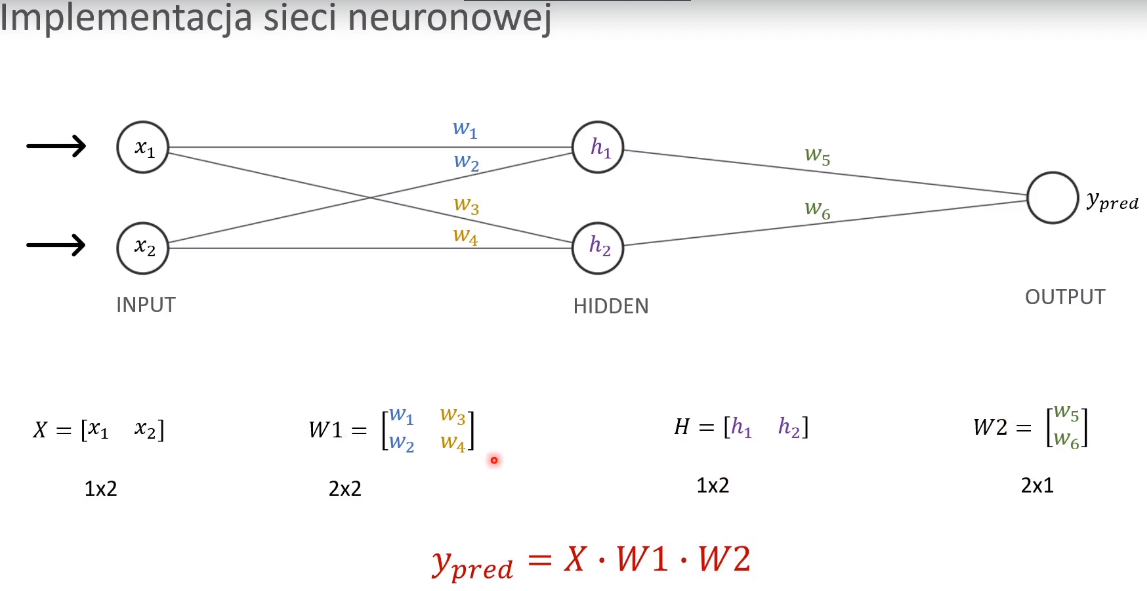

In [51]:
def initialize_parameters(input_naurons, hidden_naurons, output_neurons):
  w1 = np.random.rand(hidden_naurons, input_naurons)# 2x2
  w2 = np.random.rand(hidden_naurons, output_neurons)# 2x1
  return w1, w2

In [52]:
def forward_propagation(X, w1, w2):
  X_mul_W1 = np.dot(X, w1)# X_mul_W1 -> pośredni wynik mnożenia
  y_pred = np.dot(X_mul_W1, w2)
  return X_mul_W1, y_pred

In [53]:
def calculate_error(y_pred, y_true):
  return y_pred - y_true

In [54]:
def predict(X,w1,w2):
  _ , y_pred = forward_propagation(X,w1,w2)# _ -> nie zwraca X_mul_W1
  return y_pred[0]

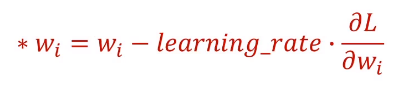

In [55]:
def backpropagation(X, w1, w2, learning_rate, iters=1000, precision = 0.0000001):

  X_mul_W1, y_pred = forward_propagation(X, w1, w2)# X_mul_W1 -> pośredni wynik mnożenia
  train_loss = []

  for i in range(iters):
    error = calculate_error(y_pred, y_true)#błąd predykcji

    w2 = w2 - learning_rate * error * X_mul_W1.T
    w1 = w1 - learning_rate * error * np.dot(X.T, w2.T)

    y_pred = predict(X, w1, w2)

    print(f'Iter #{i}: y_pred {y_pred}: loss: {abs(calculate_error(y_pred, y_true[0]))}')
    train_loss.append(abs(calculate_error(y_pred, y_true[0])))

    if abs(error) < precision:
      break

  return w1, w2, train_loss

In [56]:
def build_model():

  w1, w2 = initialize_parameters(2, 2, 1)

  w1, w2, train_loss = backpropagation(X, w1, w2, 0.01)

  model = {'w1': w1, 'w2': w2, 'train_loss': train_loss}

  return model

In [57]:
model = build_model()

Iter #0: y_pred 0.5935520725332951: loss: 1.5064479274667049
Iter #1: y_pred 0.6437738378831713: loss: 1.4562261621168289
Iter #2: y_pred 0.6939541098898803: loss: 1.4060458901101198
Iter #3: y_pred 0.7440592792786161: loss: 1.3559407207213838
Iter #4: y_pred 0.7940357079847843: loss: 1.305964292015216
Iter #5: y_pred 0.843813144668142: loss: 1.2561868553318583
Iter #6: y_pred 0.8933080761341909: loss: 1.2066919238658091
Iter #7: y_pred 0.9424269823798059: loss: 1.1575730176201942
Iter #8: y_pred 0.9910694567547622: loss: 1.1089305432452379
Iter #9: y_pred 1.0391311504440808: loss: 1.0608688495559193
Iter #10: y_pred 1.0865065016677573: loss: 1.0134934983322428
Iter #11: y_pred 1.1330912140978173: loss: 0.9669087859021828
Iter #12: y_pred 1.1787844553601536: loss: 0.9212155446398465
Iter #13: y_pred 1.2234907544291593: loss: 0.8765092455708408
Iter #14: y_pred 1.2671215855447435: loss: 0.8328784144552566
Iter #15: y_pred 1.309596635332951: loss: 0.7904033646670492
Iter #16: y_pred 1.35

Wykres funkcji straty

In [58]:
loss = pd.DataFrame({'train_loss': model['train_loss']})

In [59]:
loss

,train_loss
0,1.506448e+00
1,1.456226e+00
2,1.406046e+00
3,1.355941e+00
4,1.305964e+00
...,...
225,1.167322e-07
226,1.081194e-07
227,1.001421e-07
228,9.275335e-08


In [60]:
loss = loss.reset_index().rename(columns={'index': 'iter'})

In [61]:
loss

,iter,train_loss
0,0,1.506448e+00
1,1,1.456226e+00
2,2,1.406046e+00
3,3,1.355941e+00
4,4,1.305964e+00
...,...,...
225,225,1.167322e-07
226,226,1.081194e-07
227,227,1.001421e-07
228,228,9.275335e-08


In [62]:
loss['iter'] += 1

In [63]:
loss.tail()

,iter,train_loss
225,226,1.167322e-07
226,227,1.081194e-07
227,228,1.001421e-07
228,229,9.275335e-08
229,230,8.590977e-08


In [64]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Scatter(x = loss['iter'], y=loss['train_loss'], mode='markers+lines'))
fig.show()

In [65]:
predict(X, model['w1'], model['w2'])

2.099999914090227